In [1]:
import numpy as np
import pandas as pd 
from collections import defaultdict
from pprint import pprint
import xgboost as xgb

In [2]:
df = pd.read_csv('all_clean_new.csv')

In [3]:
df = df.drop('transactionDate', axis=1)

In [4]:
df.head()

,customerID,Gender,State,target,108000707,108005676,108037568,108100290,108100294,108100306,...,300070102,300111517,300481673,300776409,300776410,300776411,300781593,300785148,300785150,300840018
0,BBID_2041,male,no_state,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,BBID_2044,male,no_state,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,BBID_2044,male,no_state,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,BBID_2044,male,no_state,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,BBID_2044,male,no_state,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
import pickle

clf = pickle.load( open( "xgb_classifier_165_rounds.pkl", "rb" ) )

In [6]:
df_train = df[:467468]
df_test = df[467468:]

In [7]:
df_test = df_test.drop('target', axis=1)

In [8]:
def filter_data(df):
    df = df[df['State'] != 'no_state']
    df = df[df['Gender'] != 'no_gender']

In [9]:
filter_data(df_train)
filter_data(df_test)

In [10]:
dummy_col = ['Gender', 'State']
dummy_col_select = ['Gender', 'State']

In [11]:
limit = int(0.05 * len(df_train.index))
use_dummy_col = {}

for col in dummy_col_select:
    trainlist = df_train[col].value_counts()
    use_dummy_col[col] = []
    for i,item in enumerate(trainlist):
        if item > limit:
            use_dummy_col[col].append(df_train[col].value_counts().index[i])

In [12]:
def get_dummy(df):
    for col in dummy_col_select:
        for item in df[col].unique(): 
            if item not in use_dummy_col[col]:
                row_index = df[col] == item
                df.loc[row_index,col] = np.nan
    return pd.get_dummies(df, prefix=dummy_col, columns = dummy_col)

In [13]:
df_train = get_dummy(df_train)
df_test = get_dummy(df_test)

C:\Anaconda3\envs\aind-dog-copy\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
cols = list(df_train.drop(['target','customerID'], 1).columns.values)

id_preds = defaultdict(list)
ids = df_test['customerID'].values

x_test = df_test[cols]
x_test.fillna(0,inplace=True)

d_test = xgb.DMatrix(x_test)
p_test = clf[0].predict(d_test)
        
for id, p in zip(ids, p_test):
    id_preds[id] = list(p)

C:\Anaconda3\envs\aind-dog-copy\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


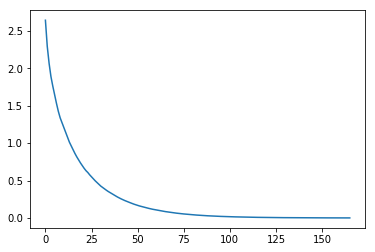

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(clf[1]['train']['mlogloss'])

In [16]:
sample = pd.read_csv('sampleSubmission.csv')

In [17]:
colsdrop = ['Gender', 'State', 'target']
df_recent = df.drop(colsdrop, axis=1)

In [18]:
already_active = {}
for row in df_recent.values:
    row = list(row)
    id = row.pop(0)
    active = [c[0] for c in zip(df_recent.columns[1:], row) if c[1] > 0]
    already_active[id] = active

In [19]:
test_preds = {}
for id, p in id_preds.items():
    preds = [i[0] for i in sorted([i for i in zip(df_recent.columns[1:], p) if i[0] not in already_active[id]], key=lambda i:i [1], reverse=True)[:20]]
    #print(len(preds))
    if len(preds) < 20:
            
            preds.insert(len(preds),("None" ))
            print(len(preds))
    test_preds[id] = preds

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2

In [20]:
users = df_recent['customerID'].tolist()

u = {}
for i in range(len(users)):
    u[users[i]] = i

In [21]:
pred = []
testusers = sample['customerID'].tolist()

n = 20
for user in testusers[:]:
    if user not in u:
        #print('1stbock')
        pred.append("300776411,300776410,108037568,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None")
        sample['products'] = pd.Series(pred)
    elif user not in test_preds.keys():
        #print('2ndblock')
        pred.append("300776411,300776410,108037568,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None")
        sample['products'] = pd.Series(pred)        
    else:
        #print('3rdblock')
        id = user
        p = test_preds[id]
        pred.append(",".join(p))
        if len(pred) < 20:
            print('if block')
            pred.append("None," * (20 - len(pred)))
#print(len(pred))

sample['products'] = pd.Series(pred)
#test['products'] = pred
#test.to_csv('sub_new_k8_12.csv', index=False)

In [22]:
sample.to_csv('xgb_165rounds_loadedpkl_nonemodified_with_nogender2.csv', index=False)